In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

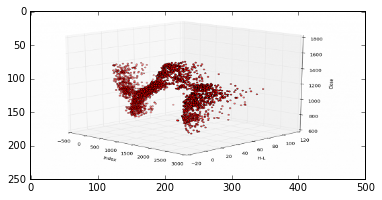

In [2]:
img1 = cv2.imread('pics/3D-Matplotlib.png')
img2 = cv2.imread('pics/mainsvmimage.png')

plt.imshow(img1)


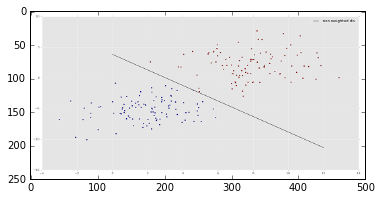

In [3]:
plt.imshow(img2)


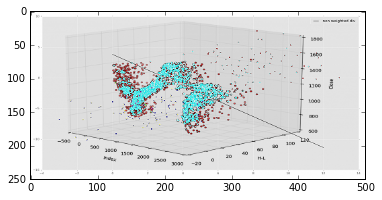

In [4]:
add = img1 + img2

plt.imshow(add)

The built in cv2.add function works as follows:  We can see that much of the image is very "white." This is because colors are 0-255, where 255 is "full light." Thus, for example: (155,211,79) + (50, 170, 200) = 205, 381, 279...translated to (205, 255,255).

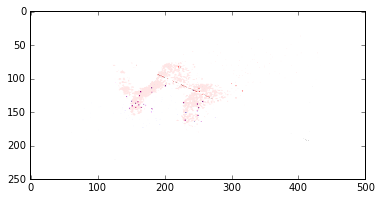

In [5]:
add = cv2.add(img1,img2)

plt.imshow(add)

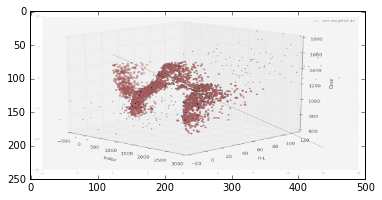

In [6]:
weighted = cv2.addWeighted(img1,0.6,img2,0.4,0)

plt.imshow(weighted)

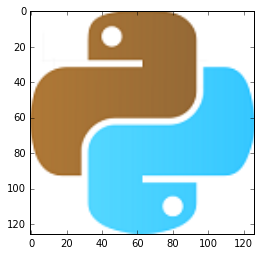

In [7]:
imgLogo = cv2.imread('pics/mainlogo.png')

plt.imshow(imgLogo)


Now, we can take this logo, and place it on the original image. That would be pretty easy (basically using the same-ish code we used in the previous tutorial where we replaced the Region of Image (ROI) with a new one), but what if we just want the logo part, and not the white background? We can use the same principle as we had used before for the ROI replacement, but we need a way to "remove" the background of the logo, so that the white is not needlessly blocking more of the background image. First I will show the full code, and then explain:

A decent amount happened here, and a few new things showed up. The first thing we see that is new, is the application of a threshold: ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV).

We will be covering thresholding more in the next tutorial, so stay tuned for the specifics, but basically the way it works is it will convert all pixels to either black or white, based on a threshold value. In our case, the threshold is 220, but we can use other values, or even dynamically choose one, which is what the ret variable can be used for. Next, we see: mask_inv = cv2.bitwise_not(mask). This is a bitwise operation. Basically, these operators are very similar to the typical ones from python, except for one, but we wont be touching it anyway here. In this case, the invisible part is where the black is. Then, we can say that we want to black out this area in the first image, and then take image 2 and replace it's contents in that empty spot.

In [8]:
rows,cols,channels = imgLogo.shape

roi = img1[0:rows,0:cols]

img2gray = cv2.cvtColor(imgLogo,cv2.COLOR_BGR2GRAY)

ret,mask = cv2.threshold(img2gray,220,255,cv2.THRESH_BINARY_INV)

cv2.imshow('m',mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:

mask_inv = cv2.bitwise_not(mask)

cv2.imshow('m',mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
imgLogo_fg = cv2.bitwise_and(imgLogo,imgLogo,mask=mask)


In [19]:
dst = cv2.add(img1_bg,imgLogo_fg)
""
img1[0:rows,0:cols] = dst


cv2.imshow('res', img1)
cv2.waitKey()
cv2.destroyAllWindows()